In [2]:
import cv2
from matplotlib import pyplot as plt

-------------

> 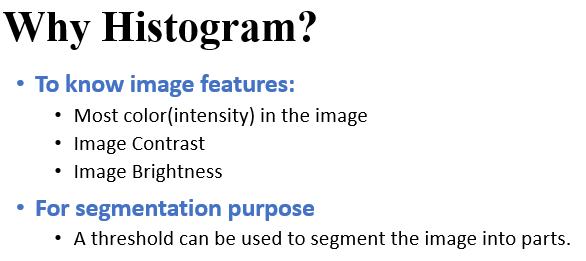
> 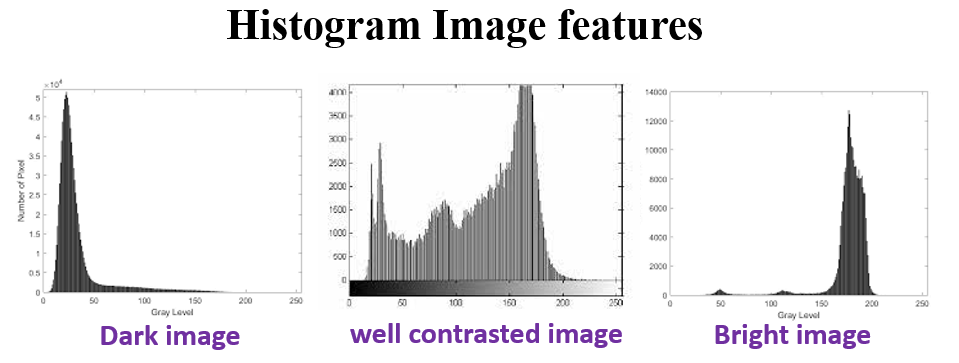

---------------

## ways to plot histogram  >>

> ### 1) cv2.calcHist >>
> 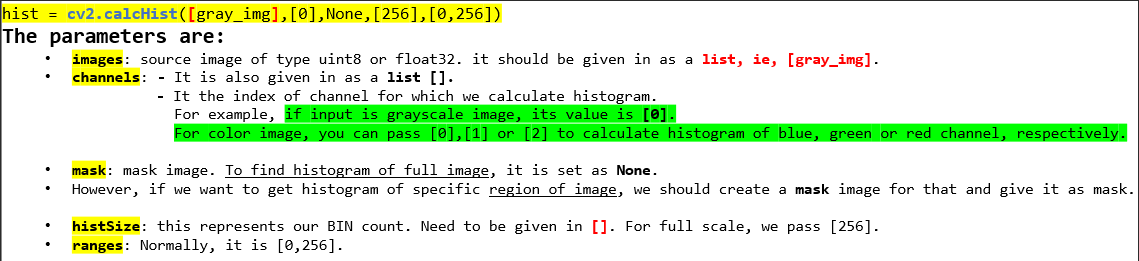

In [3]:
# cv2.calcHist( images , 
#               channels , 
#               mask , 
#               histSize , 
#               ranges[, hist[, accumulate]] ) 

In [4]:
gray_img = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)  # IMREAD_GRAYSCALE >> convert to gray scale
cv2.imshow('Golden Gate',gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

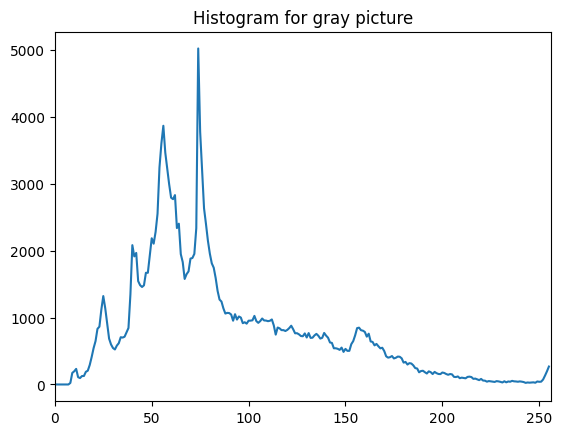

In [5]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])     # gray_img >> image, [0] >> channel, None >> mask, [256] >> hist size, [0, 256] >> range

plt.plot(hist)
plt.xlim([0, 256])
plt.title('Histogram for gray picture')
plt.show()

> ### 2) plt.hist >>

In [6]:
# plt.hist( images.ravel(),
#           histSize ,
#           ranges[, hist[, accumulate]]    )

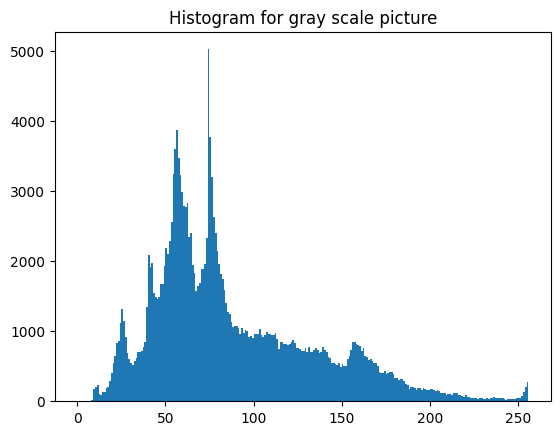

In [7]:
plt.hist(gray_img.ravel(),256,[0,256])

plt.title('Histogram for gray scale picture')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

> ## Key Differences:
> #### ```plt.hist``` is **_simpler and more suited for quick visualizations_**, but it lacks flexibility for multi-channel images.
> #### ```cv2.calcHist``` is _**more powerful for image processing as it allows channel-wise histogram computation**_ and _**can handle color images or regions of interest**_.

---------------

> ## the low contrasted image
> 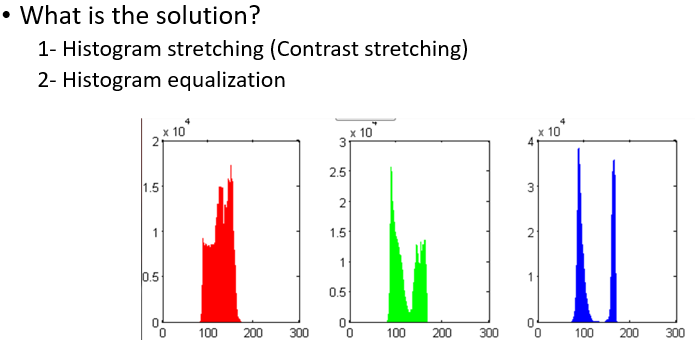

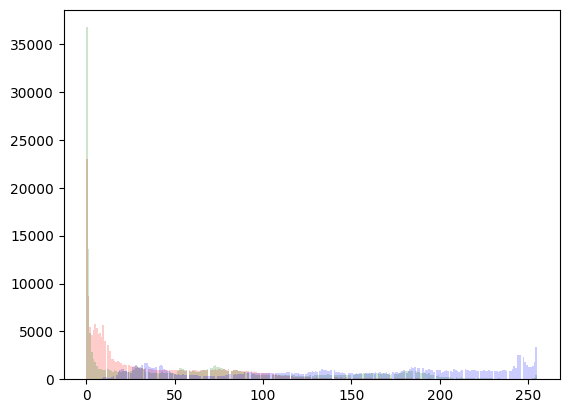

In [8]:
img_sam = cv2.imread('red.jpg')

# Split the channels into red, green, and blue
rd, gn, bl = cv2.split(img_sam)   

# Plot the histograms for each channel
plt.hist(rd.ravel(), bins=277, color='red', alpha=0.20)
plt.hist(gn.ravel(), bins=277, color='green', alpha=0.20)
plt.hist(bl.ravel(), bins=277, color='blue', alpha=0.20)
plt.show()

# Stretch the contrast for each channel
red_c_stretch = cv2.equalizeHist(rd)
green_c_stretch = cv2.equalizeHist(gn)
blue_c_stretch = cv2.equalizeHist(bl)

# Merge the channels back together
img_stretch = cv2.merge((red_c_stretch, green_c_stretch, blue_c_stretch))   # cv2.merge( (red, green, blue) )

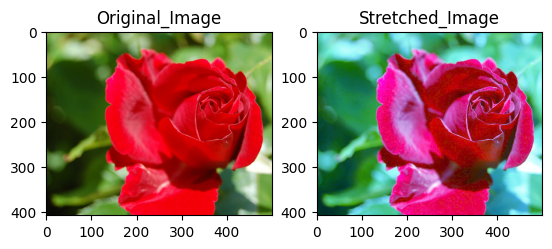

In [9]:
# Display the original and stretched images side by side
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_sam, cv2.COLOR_BGR2RGB)) 
plt.title('Original_Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_stretch, cv2.COLOR_BGR2RGB))
plt.title('Stretched_Image')

plt.show()